In [1]:
### Load PPS model
%run ./HC_NS_model.ipynb

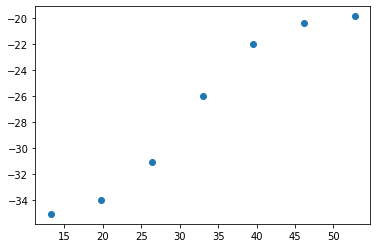

In [3]:
### Visuotactile experiment simulation setup

# Distance points in cm (network coordinates)
v_distances = np.asarray([13.2, 23.1, 33, 42.9, 52.8])
mydistances = np.linspace(v_distances[0], v_distances[-1], 7)

## Simulation setup
simtime = 100  # ms
g = 0.6

## Synapses setup
B_0 = 1.5
L_ex, L_in, S_ex, S_in = 0.15, 0.05, 1, 4

# Experimental Data
ymin = -35.42227065473723
ymax = -19.68086767326455
cp = 31.0507
slope = 4.8447

ASD_NS_RTs = RTsig(mydistances, cp, slope)
plt.scatter(mydistances, ASD_NS_RTs)

In [3]:
def asdnonsocialmodelrun(theta):
    asdRTs, ZMs, ZTs, ZAs = experimentrun(
        mydistances, simtime, theta[0], g, L_ex, L_in, S_ex, S_in, B_0
    )
    yf = ASD_NS_RTs
    xf = asdRTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias > 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(0, 1)]
asdnonsocialres_beta = differential_evolution(asdnonsocialmodelrun, bounds, disp=True)

differential_evolution step 1: f(x)= 345.761
differential_evolution step 2: f(x)= 345.761
differential_evolution step 3: f(x)= 345.761
differential_evolution step 4: f(x)= 213.692
differential_evolution step 5: f(x)= 213.692
differential_evolution step 6: f(x)= 213.692
differential_evolution step 7: f(x)= 213.692
differential_evolution step 8: f(x)= 213.692
differential_evolution step 9: f(x)= 213.692
differential_evolution step 10: f(x)= 213.692
differential_evolution step 11: f(x)= 213.692
differential_evolution step 12: f(x)= 213.692
differential_evolution step 13: f(x)= 213.692
differential_evolution step 14: f(x)= 213.692
differential_evolution step 15: f(x)= 213.692
differential_evolution step 16: f(x)= 213.692
differential_evolution step 17: f(x)= 213.692
differential_evolution step 18: f(x)= 213.692


In [4]:
print(asdnonsocialres_beta)

     fun: 213.69193475549918
 message: 'Optimization terminated successfully.'
    nfev: 287
     nit: 18
 success: True
       x: array([0.91915066])


In [4]:
asdRTs, ZMs, ZTs, ZAs = experimentrun(
    mydistances, simtime, 0.91915066, g, L_ex, L_in, S_ex, S_in, B_0
)

5.029315308541629 -15.977252740525818


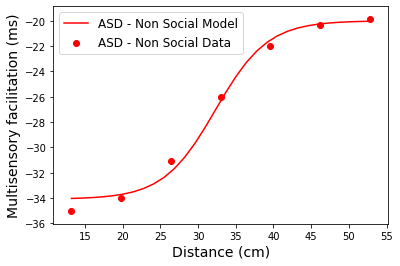

In [6]:
mydistances = np.linspace(v_distances[0], v_distances[-1], 7)
xf = asdRTs
yf = ASD_NS_RTs
m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
    xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
)
bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

ymin, ymax = np.min(m * xf + bias), np.max(m * xf + bias)
dc, h = sigfit(mydistances, m * xf + bias)
mydistances_exp = np.linspace(v_distances[0], v_distances[-1], 30)
yf_exp = RTsig(mydistances_exp, dc, h)

plt.figure(1)
plt.plot(mydistances_exp, yf_exp, label="ASD - Non Social Model", color="r")
plt.scatter(mydistances, yf, label="ASD - Non Social Data", color="r")
plt.ylabel("Multisensory facilitation (ms)", size=14)
plt.xlabel("Distance (cm)", size=14)
plt.legend(prop={"size": 12})
print(m, bias)

In [7]:
nonsocialasd = np.asarray([yf_exp, yf])
np.save("Results/nonsocialasd_alter.npy", nonsocialasd)